# Unsupervised Learning - Part 5

#### Dimensionality reduction techniques that can be implemented using python

* Missing Value Ratio
* Low Variance Filter
* High Correlation Filter
* Random Forest
* Backward Feature Elimination
* Forward Feature Selection
* Factor Analysis
* Principal Component Analysis
* Independent Component Analysis
* Methods Based on Projections
* t-Distributed Stochastic Neighbor Embedding (t-SNE)
* UMAP
* Singular Value Decomposition (SVD)
* Linear Discriminant Analysis (LDA)
* Kernel PCA
* Isometric mapping
* Locally Linear Embedding (LLE)




## PCA on multimedia Dataset

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

X = np.load('X.npy')
Y = np.load('Y.npy')

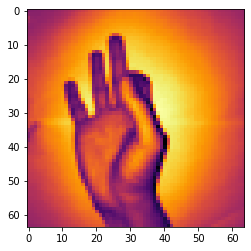

In [12]:
plt.imshow(X[0],cmap='inferno')       #Display of image

In [13]:
X.shape

(2062, 64, 64)

In [14]:
Y.shape

(2062, 10)

In [15]:
X_flattened = np.array(X).reshape((2062,64*64)) #Flatten each image i.e. MxN ---> 1X(M*N)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_flattened, Y, test_size=0.3, random_state=0)

In [17]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20), random_state=1)
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [18]:
y_hat = clf.predict(X_test)

print("accuracy: " + str(accuracy_score(y_test, y_hat)))

accuracy: 0.29079159935379645


### inference:
* Accuracy is very low = **29.07%**

In [19]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1 #the number of dimensions(d) such that at least 95% variance is explained
d

292

In [20]:
pca_d = PCA(n_components=d)   #Transforming dataset using PCA
X_pcad = pca_d.fit_transform(X_train)

In [21]:
clf_reduced = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20), random_state=1)
clf_reduced.fit(X_pcad, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [23]:
X_test_pcad = pca_d.transform(X_test)
pred = clf_reduced.predict(X_test_pcad)
print(f"Test accuracy is : {round(100*accuracy_score(y_test, pred), 2)}")

Test accuracy is : 68.98


### Inference:
* The accuracy is improved drastically from 29% to 69%, that an increase of 40% by using PCA